In [7]:
#perceptron learning(sinle layer perceptron)

In [8]:
from sklearn import datasets

In [18]:
X,y=datasets.make_blobs(n_samples=150,n_features=2,centers=2,cluster_std=1.05,random_state=2)

In [19]:
y

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

Text(0.5, 1.0, 'Random Classification with 2 classes')

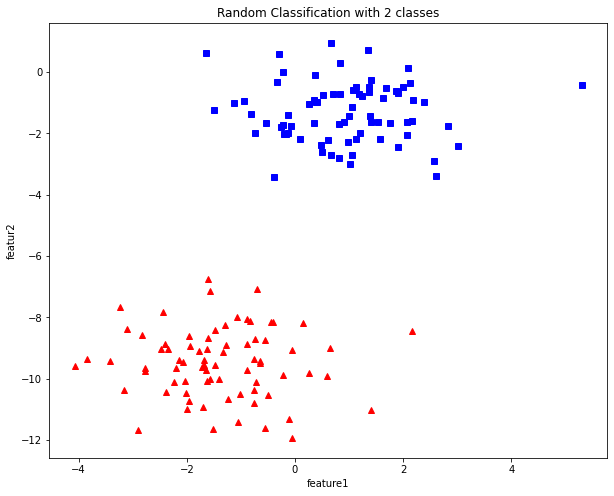

In [39]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,8))
plt.plot(x[:,0][y==0],X[:,1][y==0],'r^')
plt.plot(x[:,0][y==1],X[:,1][y==1],'bs')
plt.xlabel("feature1")
plt.ylabel("featur2")
plt.title("Random Classification with 2 classes")

In [40]:
def step_func(z):
    return 1.0 if (z>0) else 0.0

this function is used to deploy perceptron learning the logic of weight updatation rule will be implemented in the body of the function.
the data varibale used as follows
1. X= A matrix of input feature
2. y=column of labels or target
3. lr=learning rate
4. epoch= number of iteration 
5. m=number of training sample
6. n=number of features 
7. weights=connection weights
8. n_miss_list=an array of miss classified examples



In [41]:
def perceptron(X,y,lr,epochs):
    m,n=X.shape
    weights=np.zeros((n+1,1))
    n_miss_list=[]
    for epoch in range(epochs):
        n_miss=0
        for idx,x_i in enumerate(X):
            x_i=np.insert(x_i,0,1).reshape(-1,1)
            y_hat=step_func(np.dot(x_i.T,weights))
            if(np.squeeze(y_hat)-y[idx])!=0:
                weights+=lr*((y[idx]-y_hat)*x_i)
                n_miss+=1
    n_miss_list.append(n_miss)
    return weights,n_miss_list

In [42]:
def plot_decision_boundary(X,weights):
    x1=[min(X[:,0]),max(X[:,0])]
    m=-weights[1]/weights[2]
    c=-weights[0]/weights[2]
    x2=m*x1+c
    fig=plt.figure(figsize=(10,8))
    plt.plot(X[:,0][y==0],X[:,1][y==0],'r^')
    plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
    plt.xlabel("feature1")
    plt.ylabel("feature2")
    plt.title("perceptron learning")
    plt.plot(x1,x2,'y-')
    

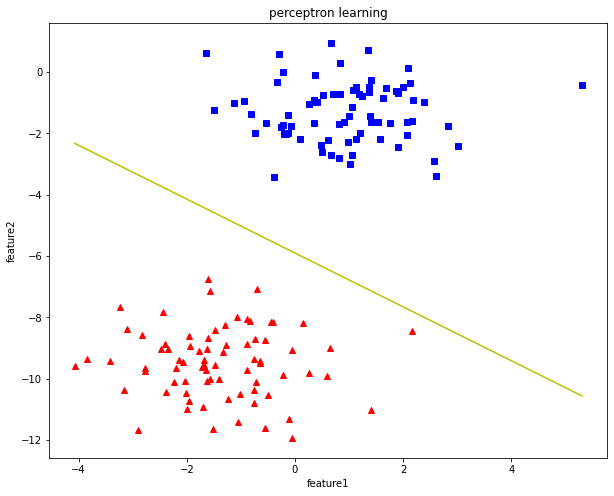

In [43]:
import numpy as np
weights ,miss_1 = perceptron(X,y,0.5,100)
plot_decision_boundary(X,weights)

# questions for viva

Q1 functions used in the program
make_blobs this function is used synthetically generate a dataset
n_samples is the total is the total number of samples you want in the dataset 
simliarly n_feature is the total number of input features 
centers represents the total number of groups clusters or classes you want 

Q2 np.zeros
this python function returns a new array of given shape and size field with zeros 
for example np.zeros(5) will give ([0.,0.,0.,0.,0.])
np.zeros(2,1) will give ([[0.],[0.]])
np.zeros(2,2) will give ([[0.,0.]],[[0.,0.]])

Q3 numpy.insert 
function insert values along the given axis
for example suppose we have array A=[1,1],[2,2],[3,3] 
if we give the command np.insert(A,1,5,axis=1) then 5 will be inserted in the array A at column number 1

Q4 np.reshape(-1,1) 
reshaped function is used to give a new shape to the numpy array 
numpy allows us to give 1 parameter in the reshape functioin as -1
for example(2,-1) is allowed 
(-1,3) is allowed but (-1,-1) is not allowed
-1 simply means unknown dimension and we want numpy to figure it out 
for example if you have z= [[1,2,3,4],[5,6,7,8],[9,10,11,12]]
z.reshape(-1) will convert this array into a single row as follows z=[1,2,3,4,5,6,7,8,9,10,11,12]
z.reshape(-1,1) will result in column =[1],[2],[4],[5],[6],[7],[8],[9],[10],[11],[12]]

Q5. np.squeez() is used when we want to remove single dimensional entries from the shape of an array
suppose array A = [[[2,2,2],[2,2,2]]] output of the squeezed array will be it will remove one [] means will remove 
one dimension.